# 1. Importing the necessary libraries

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Loading Training and Testing Datasets

In [2]:
train_data = pd.read_csv("C:\\Users\\Narokwe\\Desktop\\train.csv")
test_data = pd.read_csv("C:\\Users\\Narokwe\\Desktop\\test.csv")

# 3. Displaying the First few rows of the datasets

In [3]:
print("First few rows of the training dataset:")
print(train_data.head())

print("\nFirst few rows of the test dataset:")
print(test_data.head())

First few rows of the training dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

# 4. Preprocessing the Dataset

In [4]:
def preprocess_data(data):
    # Impute missing values for 'Age' and 'Fare'
    imputer = SimpleImputer(strategy='median')
    data['Age'] = imputer.fit_transform(data[['Age']])
    data['Fare'] = imputer.fit_transform(data[['Fare']])

    # Fill missing 'Embarked' values with the most frequent value
    if 'Embarked' in data.columns:
        data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Convert categorical variables into dummy/indicator variables
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

    # Create 'FamilySize' feature
    data['FamilySize'] = data['SibSp'] + data['Parch']

    # Drop columns that won't be used
    data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], inplace=True, errors='ignore')
    
    return data

# Preprocess the datasets
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Ensure that the same columns are present in both datasets
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[train_data.columns.drop('Survived')]

# Check the result
print(train_data.head())
print(test_data.head())

   Survived  Pclass   Age     Fare  Sex_male  Embarked_Q  Embarked_S  \
0         0       3  22.0   7.2500      True       False        True   
1         1       1  38.0  71.2833     False       False       False   
2         1       3  26.0   7.9250     False       False        True   
3         1       1  35.0  53.1000     False       False        True   
4         0       3  35.0   8.0500      True       False        True   

   FamilySize  
0           1  
1           1  
2           0  
3           1  
4           0  
   Pclass   Age     Fare  Sex_male  Embarked_Q  Embarked_S  FamilySize
0       3  34.5   7.8292      True        True       False           0
1       3  47.0   7.0000     False       False        True           1
2       2  62.0   9.6875      True        True       False           0
3       3  27.0   8.6625      True       False        True           0
4       3  22.0  12.2875     False       False        True           2


# 5. Performing Exploratory Data Analysis (EDA)

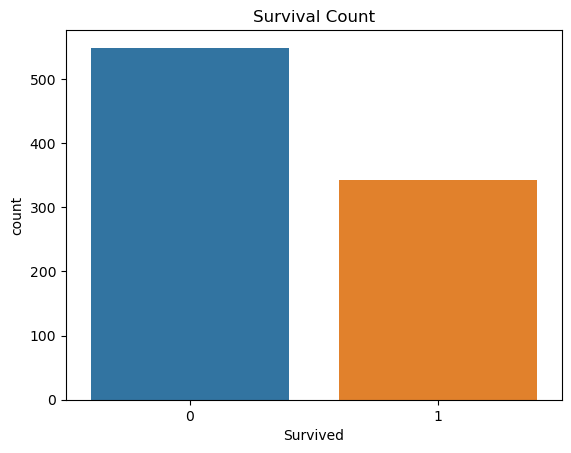

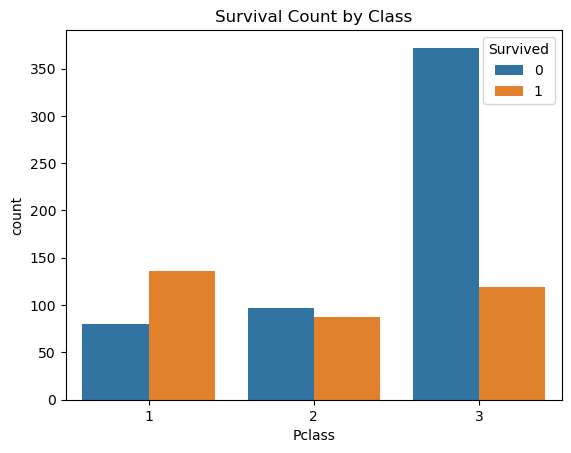

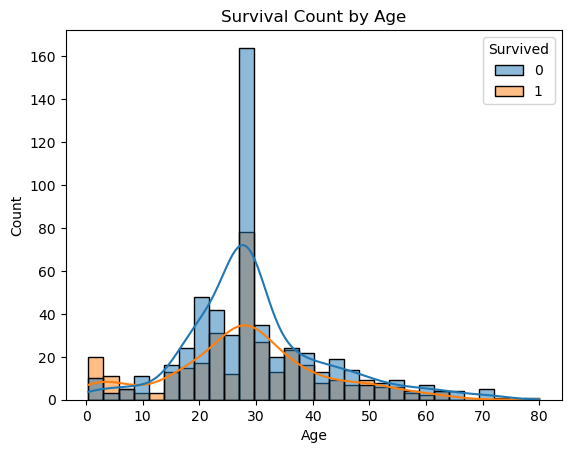

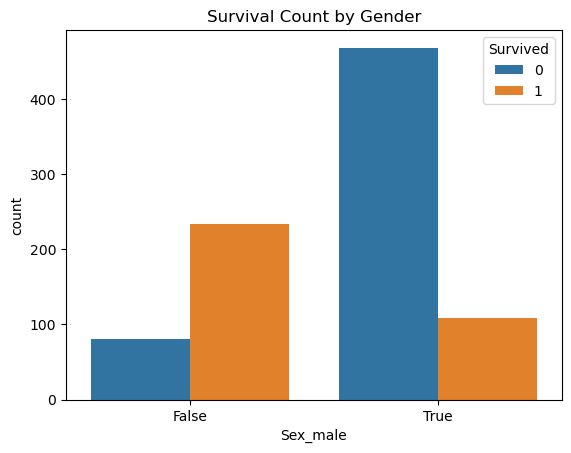

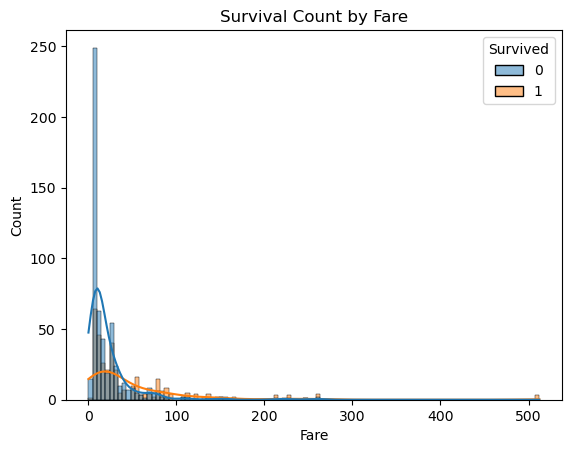

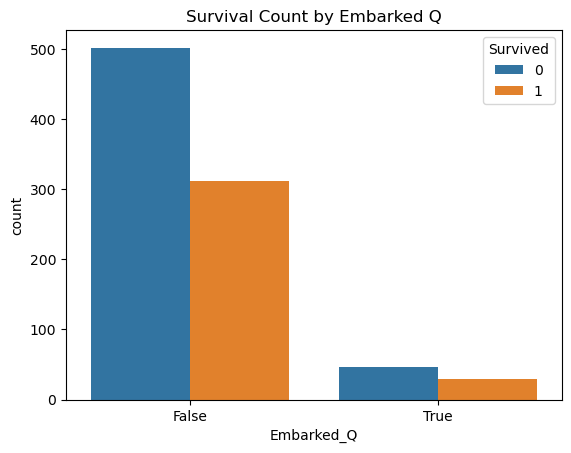

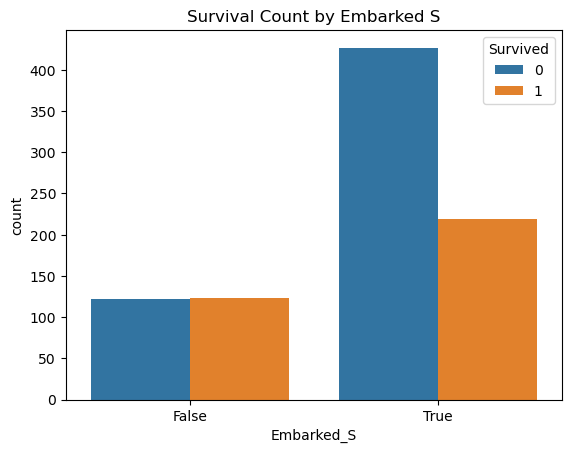

In [5]:
sns.countplot(data=train_data, x='Survived')
plt.title('Survival Count')
plt.show()

sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Survival Count by Class')
plt.show()

sns.histplot(data=train_data, x='Age', hue='Survived', kde=True)
plt.title('Survival Count by Age')
plt.show()

sns.countplot(data=train_data, x='Sex_male', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True)
plt.title('Survival Count by Fare')
plt.show()

if 'Embarked_Q' in train_data.columns:
    sns.countplot(data=train_data, x='Embarked_Q', hue='Survived')
    plt.title('Survival Count by Embarked Q')
    plt.show()

if 'Embarked_S' in train_data.columns:
    sns.countplot(data=train_data, x='Embarked_S', hue='Survived')
    plt.title('Survival Count by Embarked S')
    plt.show()

# 6. Model Building

# 6.1 # Splitting the data into training and validation sets

In [7]:
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 6.2  Building a RandomForestClassifier model

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 7. Model Evaluation

# 7.1 Evaluating the model on the validation set

In [9]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.83


# 8. Applying the Testing Dataset to the Model

# 8.1 Applying the model to the test dataset

In [10]:
test_predictions = model.predict(test_data)

# 8.2 Preparing the submission file

In [11]:
submission = pd.DataFrame({
    'PassengerId': pd.read_csv("C:\\Users\\Narokwe\\Desktop\\test.csv")['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)

# 8.3 Printing out the submission results

In [12]:
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
